In [1]:
#import thư viện
import numpy as np
from math import nan, isnan
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler , RobustScaler, StandardScaler 
import pickle
import joblib
import warnings
import re
import time
import csv
import random
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")

# Xử lí Data Cơ bản

Đọc dataset AloCleaned

In [2]:
dataAloNhaDat = pd.read_csv('sample_data/dataAloCleaned.csv',encoding='utf-8')
dataAloNhaDat = dataAloNhaDat.drop(columns=["Unnamed: 0"])
dataAloNhaDat.info()
dataAloNhaDat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18162 entries, 0 to 18161
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      12361 non-null  float64
 1   Width          16440 non-null  float64
 2   Square         18162 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         12210 non-null  float64
 5   Kitchen        18162 non-null  int64  
 6   DiningRoom     18162 non-null  int64  
 7   Type           18162 non-null  int64  
 8   Juridical      14229 non-null  float64
 9   CarParking     18162 non-null  int64  
 10  Direction      9473 non-null   float64
 11  Rooftop        18162 non-null  int64  
 12  PricePerMet    18135 non-null  float64
 13  DistrictPoint  18162 non-null  int64  
 14  WardPoint      18103 non-null  float64
 15  RoadPoint      17731 non-null  float64
 16  WidthRoad      18104 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 2.4 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,12361.000000,16440.000000,18162.000000,14194.000000,12210.000000,18162.000000,18162.00000,18162.000000,14229.000000,18162.000000,9473.000000,18162.000000,18135.000000,18162.000000,18103.000000,17731.000000,18104.000000
mean,5.745247,6.856591,199.130768,19.581794,3.231613,0.389054,0.38564,8.709448,1.026776,0.395056,4.262641,0.331571,81.714449,3.576644,27.311385,1145.430207,10.053401
std,13.900719,10.826427,3605.324994,26.422836,4.204816,0.487549,0.48676,5.398149,0.229715,0.488876,2.356672,0.470791,75.936831,1.835355,13.135378,571.482421,8.346541
min,1.000000,0.000000,20.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.170000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,75.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,42.000000,2.000000,16.000000,678.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,9.000000,1.000000,0.000000,4.000000,0.000000,61.480000,4.000000,30.000000,1146.000000,7.500000
75%,4.000000,7.000000,130.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,6.000000,1.000000,93.020000,5.000000,37.000000,1691.000000,10.500000
max,600.000000,1000.000000,390000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,8.000000,1.000000,1591.510000,7.000000,57.000000,2279.000000,56.000000


Đọc dataset BDSCleaned

In [3]:
dataBSD = pd.read_csv('sample_data/dataBDSCleaned.csv',encoding='utf-8')
dataBSD = dataBSD.drop(columns=["Unnamed: 0.1", "Unnamed: 0"])
dataBSD.info()
dataBSD.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6359 entries, 0 to 6358
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           6359 non-null   int64  
 1   BedRoooms      2748 non-null   float64
 2   Juridical      4145 non-null   float64
 3   Direction      3827 non-null   float64
 4   Width          3345 non-null   float64
 5   Square         6358 non-null   float64
 6   Floors         2165 non-null   float64
 7   PricePerMet    5386 non-null   float64
 8   DistrictPoint  5850 non-null   float64
 9   WardPoint      5581 non-null   float64
 10  RoadPoint      4260 non-null   float64
 11  WidthRoad      5184 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 596.3 KB


,Type,BedRoooms,Juridical,Direction,Width,Square,Floors,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,6359.000000,2748.000000,4145.000000,3827.000000,3345.000000,6358.000000,2165.000000,5386.000000,5850.000000,5581.000000,4260.000000,5184.000000
mean,3.662368,5.406477,1.021230,5.330546,8.985761,869.376206,3.372286,76.881783,3.988547,28.455116,1191.361268,11.606009
std,3.746994,13.590760,0.144169,2.231321,15.304393,16322.606034,2.436622,77.441682,2.026337,12.756262,625.569507,9.681551
min,1.000000,1.000000,1.000000,2.000000,1.000000,14.200000,1.000000,0.010000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,2.000000,1.000000,4.000000,5.000000,84.050000,2.000000,31.700000,2.000000,19.000000,656.750000,6.000000
50%,2.000000,3.000000,1.000000,5.000000,6.000000,108.000000,3.000000,55.350000,4.000000,33.000000,1152.000000,7.500000
75%,2.000000,4.000000,1.000000,7.000000,10.000000,200.000000,4.000000,93.162500,6.000000,39.000000,1692.000000,14.000000
max,15.000000,200.000000,2.000000,9.000000,500.000000,800000.000000,24.000000,1127.920000,7.000000,45.000000,2347.000000,56.000000


Add dataBSD vào dataAlo

In [4]:
data = dataAloNhaDat.append(dataBSD, ignore_index=True)
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,4.569925,0.331571,80.607832,3.676995,27.580898,1154.327770,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.371028,0.470791,76.309409,1.891906,13.055793,582.620444,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,2.000000,17.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,5.000000,0.000000,60.240000,4.000000,31.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,7.000000,1.000000,93.060000,5.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,9.000000,1.000000,1591.510000,7.000000,57.000000,2347.000000,56.000000


Đưa value của Direction -1 vì 1 là nan

In [5]:
def convertDirection(x):
  if x == 1:
    return None
  else:
    return x - 1

data['Direction'] = data['Direction'].apply(lambda x: convertDirection(x))
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,11938.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,3.977216,0.331571,80.607832,3.676995,27.580898,1154.327770,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.154807,0.470791,76.309409,1.891906,13.055793,582.620444,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,2.000000,17.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,4.000000,0.000000,60.240000,4.000000,31.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,6.000000,1.000000,93.060000,5.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,8.000000,1.000000,1591.510000,7.000000,57.000000,2347.000000,56.000000


Update BedRoooms, Floors, Kitchen,	DiningRoom, Rooftop theo Type.

In [6]:
def processingTypeTrueFalse(data):
  for i in range(0, len(data)):
    item = data.iloc[i]
    if isnan(item['BedRoooms']) and (item['Type'] == 13 or item['Type'] == 10 or item['Type'] == 7 or item['Type'] == 6 or item['Type'] == 1):
        data.loc[i, ['BedRoooms']] = [0]
    if isnan(item['Floors']):
      if (item['Type'] == 13 or item['Type'] == 7 or item['Type'] == 6 or item['Type'] == 1):
        data.loc[i, ['Floors']] = [0]
      if (item['Type'] == 10):
        data.loc[i, ['Floors']] = [1]
    if isnan(item['Kitchen'])and (item['Type'] == 13 or item['Type'] == 10 or item['Type'] == 7 or item['Type'] == 6 or item['Type'] == 1):
        data.loc[i, ['Kitchen']] = [0]
    if isnan(item['DiningRoom'])and (item['Type'] == 13 or item['Type'] == 10 or item['Type'] == 7 or item['Type'] == 6 or item['Type'] == 1):
        data.loc[i, ['DiningRoom']] = [0]
    if isnan(item['Rooftop'])and (item['Type'] == 13 or item['Type'] == 10 or item['Type'] == 7 or item['Type'] == 6 or item['Type'] == 1):
        data.loc[i, ['Rooftop']] = [0]
  return data
  
data = processingTypeTrueFalse(data)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15349 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14611 non-null  float64
 5   Kitchen        18352 non-null  float64
 6   DiningRoom     18352 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18352 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15349.000000,19785.000000,24520.000000,14194.000000,14611.000000,18352.000000,18352.000000,24521.000000,18374.000000,18162.000000,11938.000000,18352.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.594762,7.216565,372.924426,19.581794,3.200329,0.385026,0.381648,7.400595,1.025525,0.395056,3.977216,0.328139,80.607832,3.676995,27.580898,1154.327770,10.399018
std,13.754444,11.731183,8876.387743,26.422836,3.978008,0.486615,0.485804,5.487840,0.213442,0.488876,2.154807,0.469548,76.309409,1.891906,13.055793,582.620444,8.685372
min,0.000000,0.000000,14.200000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,2.000000,17.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.000000,8.000000,1.000000,0.000000,4.000000,0.000000,60.240000,4.000000,31.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.000000,14.000000,1.000000,1.000000,6.000000,1.000000,93.060000,5.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.000000,15.000000,3.000000,1.000000,8.000000,1.000000,1591.510000,7.000000,57.000000,2347.000000,56.000000


Các hàm làm sạch dữ liệu

In [7]:
def processing_technique(name_tech, columns):
    data_temp = data.copy()
    if name_tech == 'MEAN_VALUE':
        mean = data_temp[columns].mean()
        data_temp[columns] = data_temp[columns].fillna(mean)
    if name_tech == 'MEDIAN_VALUE':
        median = data_temp[columns].median()
        data_temp[columns] = data_temp[columns].fillna(median)
    if name_tech == 'MODE_VALUE':
        mode = data_temp[columns].mode()[0]
        data_temp[columns] = data_temp[columns].fillna(mode)
    if name_tech == 'RANDOM_VALUE':
        random = data_temp[columns].dropna().sample(n=data_temp[columns].isnull().sum(), random_state=0, replace=True)
        random.index = data_temp[data_temp[columns].isnull()].index
        data_temp[columns].update(random)
    return data_temp

Làm sạch dữ liệu

In [8]:
data = processing_technique("MEAN_VALUE", "BedRoooms")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Width")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Square")#phân phối lệch
data = processing_technique("MEDIAN_VALUE", "Length")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Floors")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Kitchen")
data = processing_technique("RANDOM_VALUE", "DiningRoom")
data = processing_technique("RANDOM_VALUE", "Type")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Juridical")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "CarParking")
data = processing_technique("RANDOM_VALUE", "Direction")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Rooftop")
data = processing_technique("MEAN_VALUE", "PricePerMet")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "DistrictPoint")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "WardPoint")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "RoadPoint")#phân phối lệch
data = processing_technique("MEDIAN_VALUE", "WidthRoad")#phân phối lệch
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,5.594762,7.216565,372.924426,19.336772,3.228906,0.384487,0.380980,7.400595,1.024877,0.393214,3.970637,0.327067,80.607832,3.674361,27.606745,1154.750377,10.253245
std,10.882000,10.537526,8876.206738,20.104840,4.546579,0.486484,0.485637,5.487840,0.209951,0.488474,2.153612,0.469151,74.737147,1.891886,13.042090,582.167516,8.487858
min,0.000000,0.000000,14.200000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,18.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,40.620000,2.000000,17.000000,678.000000,5.500000
50%,5.000000,5.100000,100.000000,19.000000,3.000000,0.000000,0.000000,8.000000,1.000000,0.000000,4.000000,0.000000,62.300000,4.000000,31.000000,1146.000000,7.500000
75%,5.594762,7.216565,147.000000,20.000000,3.000000,1.000000,1.000000,14.000000,1.000000,1.000000,6.000000,1.000000,90.830000,5.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.000000,15.000000,3.000000,1.000000,8.000000,1.000000,1591.510000,7.000000,57.000000,2347.000000,56.000000


Hàm vẽ đồ thị kiểm tra phân phối

In [9]:
fontdict = {"fontsize": 16, "fontweight": "bold"}

def distribution_chart(col):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), dpi=100)

    sns.histplot(data=data, x=col, ax=axes[0])
    axes[0].set_title(f"{col} Distribution - Histogram", fontdict=fontdict)

    sns.kdeplot(data=data, x=col, ax=axes[1])
    axes[1].set_title(f"{col} Distribution - Kdeplot", fontdict=fontdict) 
    plt.show(fig)

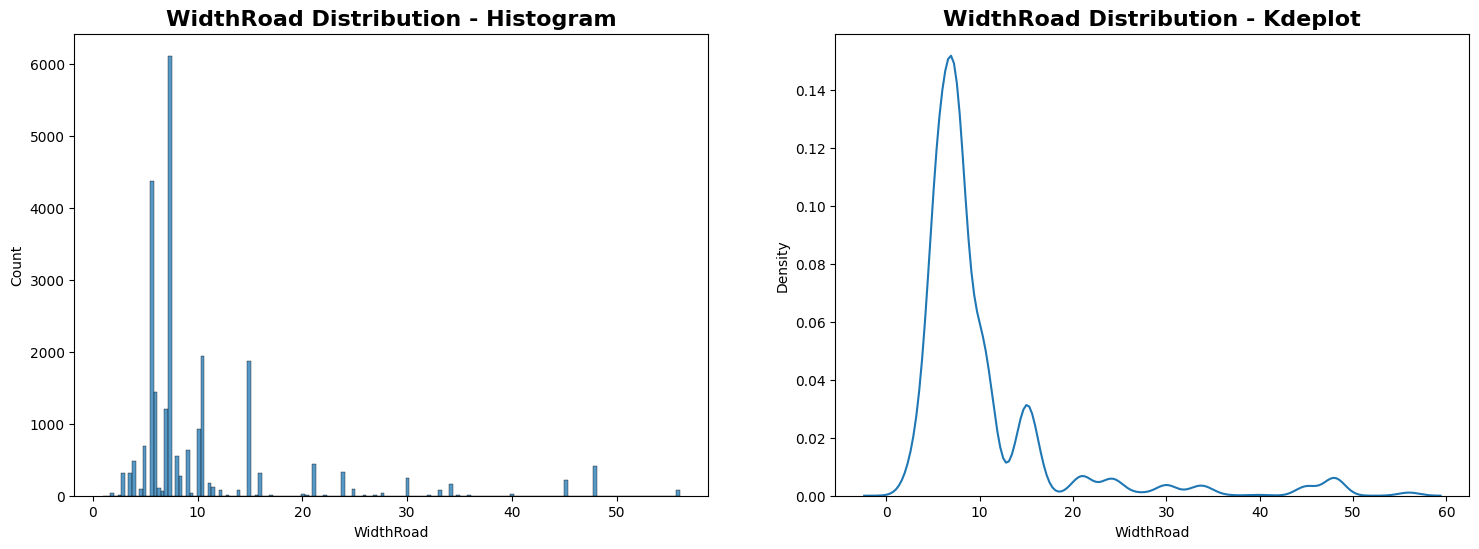

In [10]:
distribution_chart("WidthRoad")

Hàm xử lý ngoại lệ

In [11]:
#True danh cho phan bo chuan, False danh cho phan bo Lech
def exception_handling(column, cd, data):
  if cd == True:
    upper_column = data[column].mean() + 3* data[column].std()
    lower_column = data[column].mean() - 3* data[column].std()
    data.loc[data[column] >= round(upper_column), column] = round(upper_column)
    data.loc[data[column] <= round(lower_column), column] = round(lower_column)
  else:
    q1, q3 = np.percentile(data[column], [25, 75])  
    IQR = q3 - q1
    upper_column = q3 + 3 * IQR
    lower_column = q1 - 3 * IQR
    data.loc[data[column] >= upper_column, column] = round(upper_column)
    data.loc[data[column] <= lower_column, column] = round(lower_column)
  return data

Xử lý ngoại lệ

In [12]:
data = exception_handling("BedRoooms", False, data)#phân phối chuẩn
data = exception_handling("Width", False, data)#phân phối lệch
data = exception_handling("Square", False, data)#phân phối lệch
data = exception_handling("Length", False, data) #phân phối lệch
data = exception_handling("Floors", False, data)#phân phối lệch
data = exception_handling("PricePerMet", False, data)#phân phối lệch
data = exception_handling("DistrictPoint", False, data)#phân phối lệch
data = exception_handling("WardPoint", False, data)#phân phối lệch
data = exception_handling("RoadPoint", False, data)#phân phối lệch
data = exception_handling("WidthRoad", False, data)#phân phối lệch
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,4.622371,6.581973,128.697085,18.796101,2.838750,0.384487,0.380980,7.400595,1.024877,0.393214,3.970637,0.327067,76.492043,3.674361,27.606745,1154.750377,9.470406
std,2.435420,2.545498,81.349386,3.119657,1.380628,0.486484,0.485637,5.487840,0.209951,0.488474,2.153612,0.469151,52.508971,1.891886,13.042090,582.167516,5.609602
min,0.000000,0.000000,14.200000,12.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,18.000000,2.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,0.000000,40.620000,2.000000,17.000000,678.000000,5.500000
50%,5.000000,5.100000,100.000000,19.000000,3.000000,0.000000,0.000000,8.000000,1.000000,0.000000,4.000000,0.000000,62.300000,4.000000,31.000000,1146.000000,7.500000
75%,5.594762,7.216565,147.000000,20.000000,3.000000,1.000000,1.000000,14.000000,1.000000,1.000000,6.000000,1.000000,90.830000,5.000000,37.000000,1692.000000,10.500000
max,13.000000,14.000000,354.000000,26.000000,6.000000,1.000000,1.000000,15.000000,3.000000,1.000000,8.000000,1.000000,241.000000,7.000000,57.000000,2347.000000,26.000000


Heatmap thể hiện sự tương quan giữa các biến

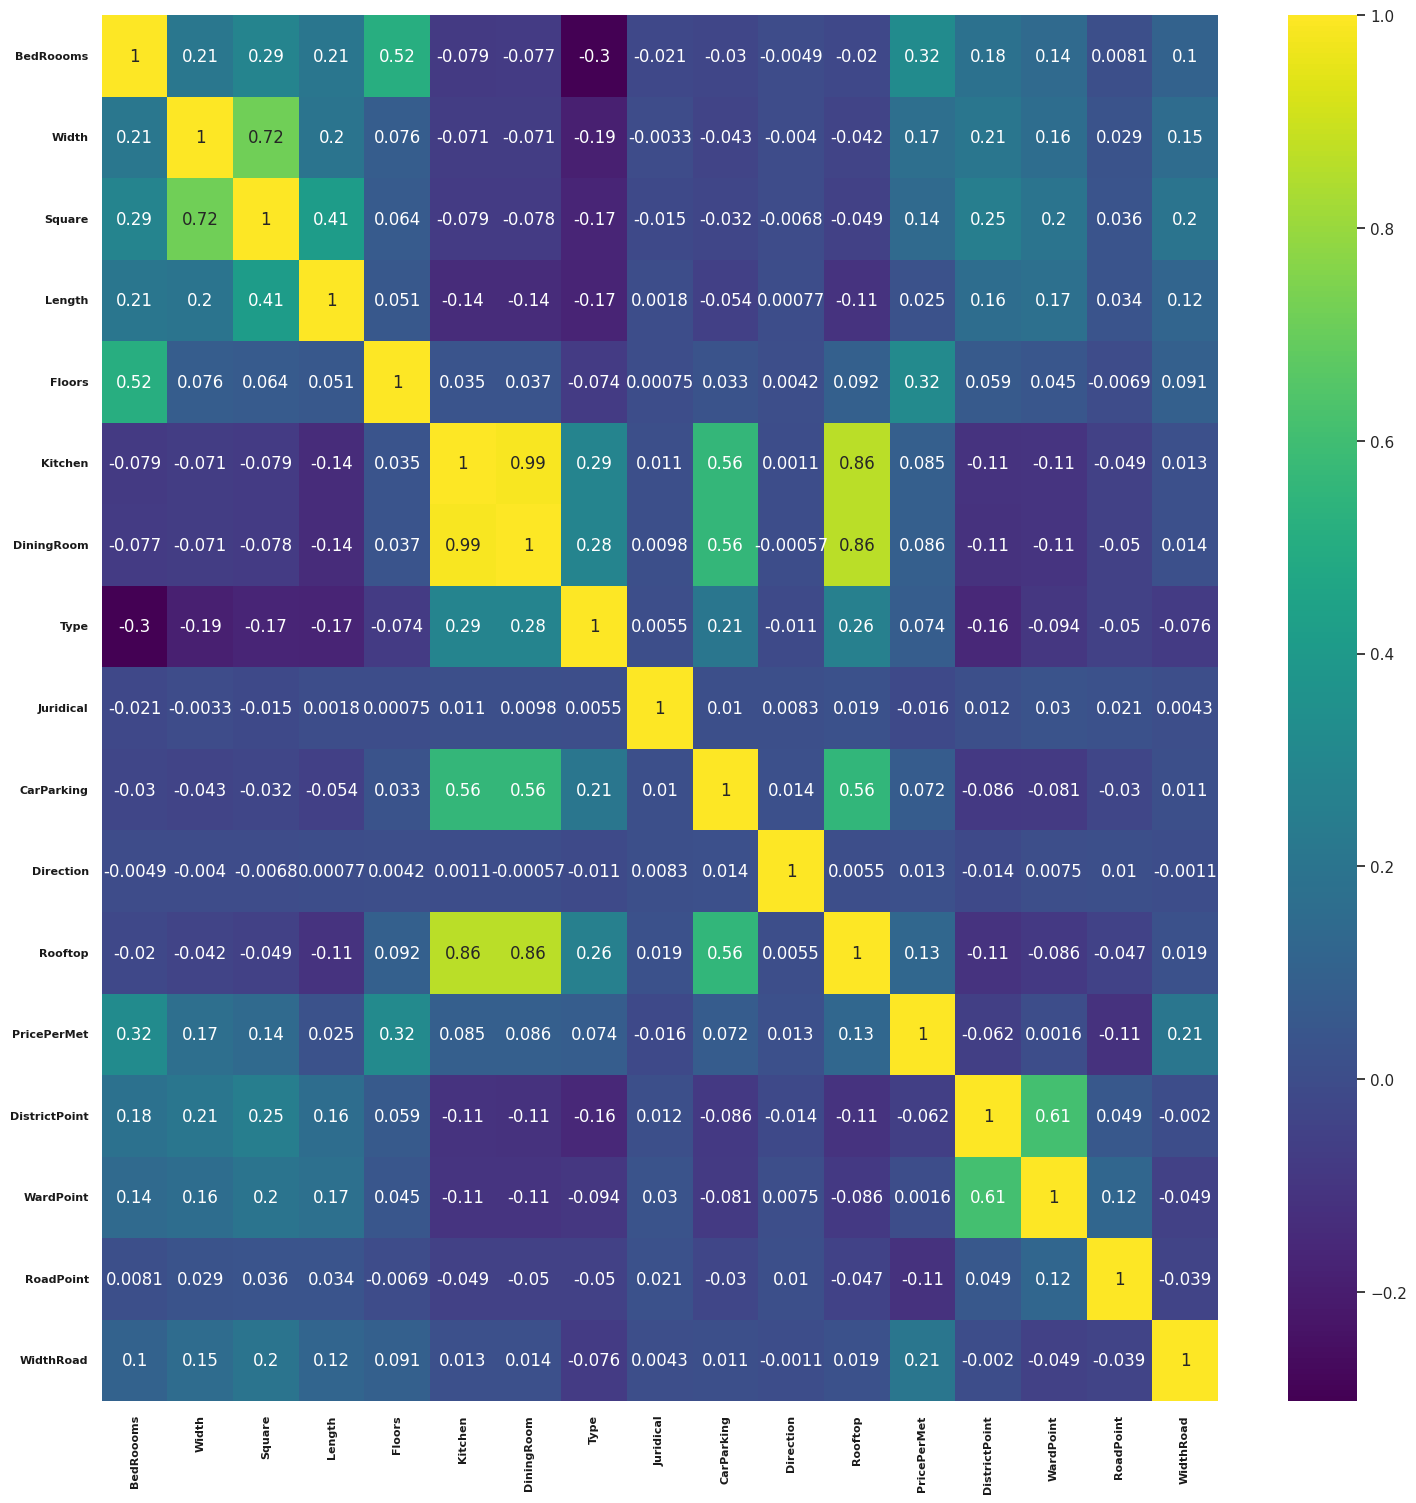

In [13]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=8,color='k',fontweight='bold')
plt.yticks(fontsize=8,color='k',fontweight='bold')
plt.show()

**Chuẩn hóa dữ liệu**

Chuẩn hoá Min-Max

In [14]:
min_max=MinMaxScaler()
df_minmax =pd.DataFrame(min_max.fit_transform(data),columns
=data.columns)
# df_minmax
df_minmax.info()
df_minmax.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,0.355567,0.470141,0.336954,0.485436,0.473125,0.384487,0.380980,0.457185,0.012438,0.393214,0.424377,0.327067,0.317366,0.445727,0.475120,0.491795,0.338816
std,0.187340,0.181821,0.239404,0.222833,0.230105,0.486484,0.485637,0.391989,0.104975,0.488474,0.307659,0.469151,0.217889,0.315314,0.232894,0.248153,0.224384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230769,0.357143,0.187758,0.428571,0.333333,0.000000,0.000000,0.071429,0.000000,0.000000,0.142857,0.000000,0.168513,0.166667,0.285714,0.288576,0.180000
50%,0.384615,0.364286,0.252501,0.500000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.428571,0.000000,0.258475,0.500000,0.535714,0.488065,0.260000
75%,0.430366,0.515469,0.390818,0.571429,0.500000,1.000000,1.000000,0.928571,0.000000,1.000000,0.714286,1.000000,0.376862,0.666667,0.642857,0.720801,0.380000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Áp dụng mô hình Linear đa biến để dự đoán**

In [15]:
def trainingLinearRegression(df_minmax):
  X = df_minmax.drop(["PricePerMet"], axis=1)
  Y = df_minmax["PricePerMet"]
  per_accuracy_arr = []
  for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33 , random_state = i)
    model = LinearRegression()
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    compare_df = pd.DataFrame({
        "Target" : Y_test,
        "Prediction" : predictions
    })
    compare_df.sample(10)
    rmse = np.sqrt(mean_squared_error(Y_test, predictions))
    r2 = r2_score(Y_test, predictions)
    per_accuracy_arr.append({'rmse': rmse, 'r2':r2 * 100})
  return per_accuracy_arr
trainingLinearRegression(df_minmax)

[{'rmse': 0.19182779485870463, 'r2': 23.88335504069895},
 {'rmse': 0.189996655494815, 'r2': 23.78163294648431},
 {'rmse': 0.19135401737707758, 'r2': 22.497215516863566},
 {'rmse': 0.18901399952844264, 'r2': 22.542231973000337},
 {'rmse': 0.19049193194012543, 'r2': 23.04064023868643},
 {'rmse': 0.19313306550286433, 'r2': 23.177112956986935},
 {'rmse': 0.1894282463587493, 'r2': 22.739602425629634},
 {'rmse': 0.1918079267426943, 'r2': 23.527729932915587},
 {'rmse': 0.19114501121879776, 'r2': 22.37396284928934},
 {'rmse': 0.1935549293505831, 'r2': 23.210355668048187}]

# Thử nghiệm Sắp xếp các trường Type, Judical, Direction, DistrictPoint, WardPoint, RoadPoint theo giá trị giảm dần

Lấy lại data từ lúc chưa xử lí để thực nghiệm

In [16]:
data = dataAloNhaDat.append(dataBSD, ignore_index=True)
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,4.569925,0.331571,80.607832,3.676995,27.580898,1154.327770,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.371028,0.470791,76.309409,1.891906,13.055793,582.620444,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,2.000000,17.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,5.000000,0.000000,60.240000,4.000000,31.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,7.000000,1.000000,93.060000,5.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,9.000000,1.000000,1591.510000,7.000000,57.000000,2347.000000,56.000000


Vẽ dữ liệu giá của 8 quận/huyện trong Đà Nẵng

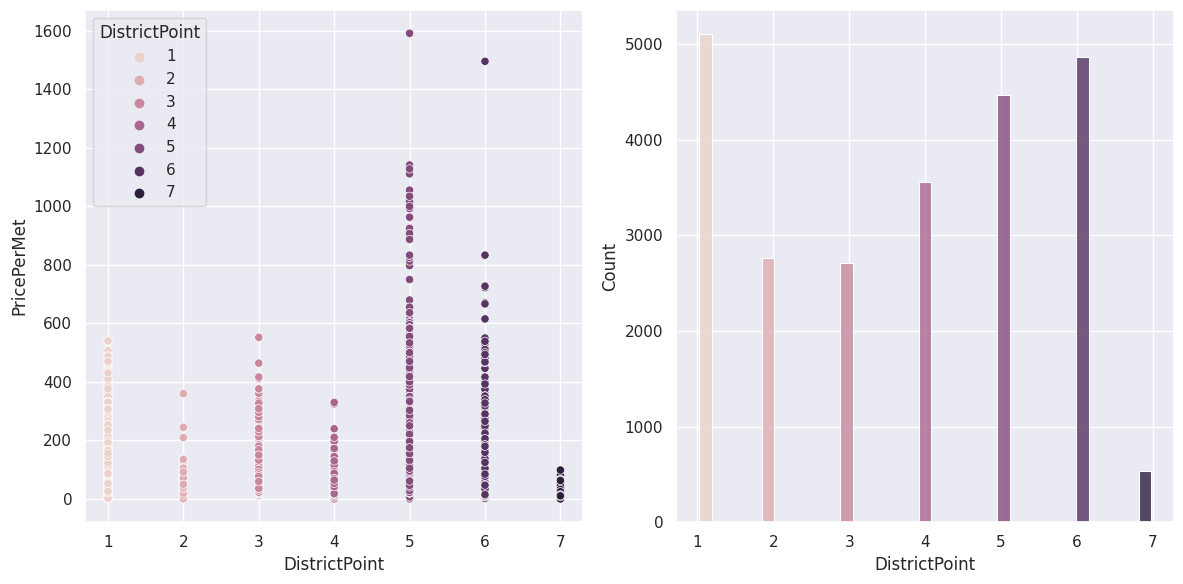

In [17]:
sns.set()
dataDistrictPrice = data[["PricePerMet", "DistrictPoint"]]
f, axs = plt.subplots(1, 2,figsize=(12, 6), gridspec_kw=dict(width_ratios=[4, 4]))
sns.scatterplot(data=dataDistrictPrice, x="DistrictPoint", y="PricePerMet", hue="DistrictPoint", ax=axs[0])
sns.histplot(data=dataDistrictPrice, x="DistrictPoint", hue="DistrictPoint", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

Hàm sắp xếp lại số point cho các data

In [18]:
def GetNewPointList(col, leng):
  dataTemp = data[[col,'PricePerMet']]
  resultSort = []
  for i in range(1, leng + 1):
    tempValue = dataTemp[dataTemp[col] == i]['PricePerMet'].mean()
    resultSort.append({col: i, 'Mean': round(tempValue, 3)})
  resultSort = sorted(resultSort, key=lambda d: d['Mean'], reverse=True)
  for i in range(1, leng + 1):
    resultSort[i - 1]['NewPoint'] = 0-i
  resultSort = pd.DataFrame.from_dict(resultSort)
  return resultSort

Hàm Update NewPoint

In [19]:
def updateNewPoint(x, col, dataNew):
  resultFind = dataNew[dataNew[col] == x]
  return resultFind.iloc[0]['NewPoint']

Update Point cho District

In [20]:
newDistrict = GetNewPointList('DistrictPoint', 7)

data['DistrictPoint'] = data['DistrictPoint'].apply(lambda x: updateNewPoint(x, 'DistrictPoint', newDistrict) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,4.569925,0.331571,80.607832,-3.259703,27.580898,1154.327770,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.371028,0.470791,76.309409,1.728290,13.055793,582.620444,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,-7.000000,1.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,-5.000000,17.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,5.000000,0.000000,60.240000,-3.000000,31.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,7.000000,1.000000,93.060000,-2.000000,37.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,9.000000,1.000000,1591.510000,-1.000000,57.000000,2347.000000,56.000000


Update Point cho District

In [21]:
newWard = GetNewPointList('WardPoint', 57)

data['WardPoint'] = data['WardPoint'].apply(lambda x: updateNewPoint(x, 'WardPoint', newWard) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,4.569925,0.331571,80.607832,-3.259703,-24.179995,1154.327770,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.371028,0.470791,76.309409,1.728290,13.209813,582.620444,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,-7.000000,-57.000000,1.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,-5.000000,-35.000000,677.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,5.000000,0.000000,60.240000,-3.000000,-28.000000,1146.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,7.000000,1.000000,93.060000,-2.000000,-12.000000,1692.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,9.000000,1.000000,1591.510000,-1.000000,-1.000000,2347.000000,56.000000


Update new Point cho RoadPoint

In [22]:
newRoad = GetNewPointList('RoadPoint', 2347)

data['RoadPoint'] = data['RoadPoint'].apply(lambda x: updateNewPoint(x, 'RoadPoint', newRoad) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,1.025525,0.395056,4.569925,0.331571,80.607832,-3.259703,-24.179995,-1165.101769,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.213442,0.488876,2.371028,0.470791,76.309409,1.728290,13.209813,602.829503,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,1.000000,0.000000,2.000000,0.000000,40.000000,-5.000000,-35.000000,-1714.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,1.000000,0.000000,5.000000,0.000000,60.240000,-3.000000,-28.000000,-1132.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,1.000000,1.000000,7.000000,1.000000,93.060000,-2.000000,-12.000000,-668.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,3.000000,1.000000,9.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Update new Point cho Juridical 

In [23]:
newJuridical = GetNewPointList('Juridical', 3)
newJuridical.to_csv('newJuridical.csv', encoding='utf-8')
data['Juridical'] = data['Juridical'].apply(lambda x: updateNewPoint(x, 'Juridical', newJuridical) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      13300 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,13300.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,-1.020028,0.395056,4.569925,0.331571,80.607832,-3.259703,-24.179995,-1165.101769,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.171220,0.488876,2.371028,0.470791,76.309409,1.728290,13.209813,602.829503,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,-3.000000,0.000000,1.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,-1.000000,0.000000,2.000000,0.000000,40.000000,-5.000000,-35.000000,-1714.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,-1.000000,0.000000,5.000000,0.000000,60.240000,-3.000000,-28.000000,-1132.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,-1.000000,1.000000,7.000000,1.000000,93.060000,-2.000000,-12.000000,-668.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,-1.000000,1.000000,9.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Update new Point cho Direction

In [24]:
data['Direction'] = data['Direction'].apply(lambda x: convertDirection(x))
newDirection = GetNewPointList('Direction', 8)
newDirection.to_csv('newDirection.csv', encoding='utf-8')

data['Direction'] = data['Direction'].apply(lambda x: updateNewPoint(x, 'Direction', newDirection) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  int64  
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(16), int64(1)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,11938.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,7.400595,-1.020028,0.395056,-5.016418,0.331571,80.607832,-3.259703,-24.179995,-1165.101769,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,5.487840,0.171220,0.488876,2.310467,0.470791,76.309409,1.728290,13.209813,602.829503,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,1.000000,-3.000000,0.000000,-8.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,2.000000,-1.000000,0.000000,-7.000000,0.000000,40.000000,-5.000000,-35.000000,-1714.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,8.000000,-1.000000,0.000000,-6.000000,0.000000,60.240000,-3.000000,-28.000000,-1132.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,14.000000,-1.000000,1.000000,-3.000000,1.000000,93.060000,-2.000000,-12.000000,-668.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,15.000000,-1.000000,1.000000,-1.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Update new Point cho Type

In [25]:
newType = GetNewPointList('Type', 15)
newType.to_csv('newType.csv', encoding='utf-8')

data['Type'] = data['Type'].apply(lambda x: updateNewPoint(x, 'Type', newType) if not isnan(x) else x)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24012 non-null  float64
 14  WardPoint      23684 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,11938.000000,18162.000000,23521.000000,24012.000000,23684.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,-8.155295,-1.020028,0.395056,-5.016418,0.331571,80.607832,-3.259703,-24.179995,-1165.101769,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,3.253162,0.171220,0.488876,2.310467,0.470791,76.309409,1.728290,13.209813,602.829503,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,-15.000000,-3.000000,0.000000,-8.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-7.000000,0.000000,40.000000,-5.000000,-35.000000,-1714.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-6.000000,0.000000,60.240000,-3.000000,-28.000000,-1132.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,-5.000000,-1.000000,1.000000,-3.000000,1.000000,93.060000,-2.000000,-12.000000,-668.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Tạo dataDistric và ghi ra file csv

In [26]:
dataDistrictDict = []
dataDistrictDict.append({'Name': 'Quận Hải Châu', 'Point': 1})
dataDistrictDict.append({'Name': 'Quận Liên Chiểu', 'Point': 2})
dataDistrictDict.append({'Name': 'Quận Thanh Khê', 'Point': 3})
dataDistrictDict.append({'Name': 'Quận Cẩm Lệ', 'Point': 4})
dataDistrictDict.append({'Name': 'Quận Sơn Trà', 'Point': 5})
dataDistrictDict.append({'Name': 'Quận Ngũ Hành Sơn', 'Point': 6})
dataDistrictDict.append({'Name': 'Huyện Hòa Vang', 'Point': 7})
dataDistrictDict.append({'Name': 'Huyện Hoàng Sa', 'Point': 8})

dataDistrict = pd.DataFrame.from_dict(dataDistrictDict)
dataDistrict.info()
dataDistrict.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    8 non-null      object
 1   Point   8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,Point
count,8.00000
mean,4.50000
std,2.44949
min,1.00000
25%,2.75000
50%,4.50000
75%,6.25000
max,8.00000


Đọc data WarDistrict

In [27]:
def getDistrictPoint(x):
  x = x.replace('Huyện Hoà Vang', 'Huyện Hòa Vang')
  resultFind = dataDistrict[dataDistrict['Name'] == x]
  if(len(resultFind) > 0):
    realResult = newDistrict[newDistrict['DistrictPoint'] == resultFind.iloc[0]['Point']]
    return realResult.iloc[0]['NewPoint']
  
def updateWardNewPoint(x):
  resultFind = newWard[newWard['WardPoint'] == x]
  if(len(resultFind) > 0):
    return resultFind.iloc[0]['NewPoint']
    
dataWardDistrict = pd.read_excel('sample_data/WardDistrict.xlsx')
dataWardDistrict.rename(columns = {
    'Phường/Xã':'Name',
    'Quận/Huyện':'NameDistrict',
  }, inplace = True)
dataWardDistrict['DistrictPoint'] = dataWardDistrict['NameDistrict']
dataWardDistrict['DistrictPoint'] = dataWardDistrict['DistrictPoint'].apply(lambda x: getDistrictPoint(x))
dataWardDistrict['Point'] = dataWardDistrict.index + 1 
dataWardDistrict['Point'] = dataWardDistrict['Point'].apply(lambda x: updateWardNewPoint(x))
dataWardDistrict.to_csv('dataWardUpdatePoint.csv', encoding='utf-8')
dataWardDistrict.info()
dataWardDistrict.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           57 non-null     object 
 1   NameDistrict   57 non-null     object 
 2   DistrictPoint  57 non-null     float64
 3   Point          57 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.9+ KB


,DistrictPoint,Point
count,57.000000,57.000000
mean,-3.964912,-29.000000
std,2.087077,16.598193
min,-7.000000,-57.000000
25%,-6.000000,-43.000000
50%,-4.000000,-29.000000
75%,-2.000000,-15.000000
max,-1.000000,-1.000000


Xử lí các giá trị null cho WardPoint( phải thuộc quận của BDS)

In [28]:
data = processing_technique("RANDOM_VALUE", "DistrictPoint")#phân phối lệch
for i in range(0, len(data)):
  item = data.iloc[i]
  if isnan(item['WardPoint']):
    listData = list(set(dataWardDistrict[dataWardDistrict['DistrictPoint'] == item['DistrictPoint']]['Point']))
    data.loc[i, ['WardPoint']] = [random.choice(listData)]

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      21991 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,11938.000000,18162.000000,23521.000000,24521.000000,24521.000000,21991.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,-8.155295,-1.020028,0.395056,-5.016418,0.331571,80.607832,-3.261082,-24.502304,-1165.101769,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,3.253162,0.171220,0.488876,2.310467,0.470791,76.309409,1.730385,13.494168,602.829503,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,-15.000000,-3.000000,0.000000,-8.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-7.000000,0.000000,40.000000,-5.000000,-36.000000,-1714.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-6.000000,0.000000,60.240000,-3.000000,-28.000000,-1132.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,-5.000000,-1.000000,1.000000,-3.000000,1.000000,93.060000,-2.000000,-12.000000,-668.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Đọc dataStreet

In [29]:
def updateWardForStreet():
  for i in range(0, len(dataStreet)):
    item = dataStreet.iloc[i]
    newDistrictTemp = newDistrict[newDistrict['DistrictPoint'] == item['DistrictPoint']].iloc[0]['NewPoint'] if not isnan(item['DistrictPoint']) else nan
    newWardTemp = newWard[newWard['WardPoint'] == item['WardPoint']].iloc[0]['NewPoint'] if not isnan(item['WardPoint']) else nan
    newStreetTemp = newRoad[newRoad['RoadPoint'] == item['Point']]
    dataStreet.loc[i, ['Point', 'DistrictPoint', 'WardPoint']] = [newStreetTemp.iloc[0]['NewPoint'] , newDistrictTemp, newWardTemp]
  return dataStreet

dataStreet = pd.read_csv('sample_data/dataStreet.csv')
dataStreet.reset_index(inplace=True, drop=True)
dataStreet = updateWardForStreet()
dataStreet.to_csv('dataStreetUpdatePoint.csv', encoding='utf-8')
dataStreet.info()
dataStreet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   2347 non-null   int64  
 1   Unnamed: 0     2279 non-null   float64
 2   index          1689 non-null   float64
 3   Name           2347 non-null   object 
 4   Point          2347 non-null   int64  
 5   DistrictPoint  1701 non-null   float64
 6   WardPoint      1690 non-null   float64
 7   WidthRoad      1662 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 146.8+ KB


,Unnamed: 0.1,Unnamed: 0,index,Point,DistrictPoint,WardPoint,WidthRoad
count,2347.000000,2279.000000,1689.000000,2347.000000,1701.000000,1690.000000,1662.000000
mean,1173.000000,1139.000000,903.563647,-1174.000000,-3.558495,-27.470414,7.277431
std,677.664863,658.034953,536.391715,677.664863,1.830370,12.464729,4.212295
min,0.000000,0.000000,0.000000,-2347.000000,-7.000000,-57.000000,1.000000
25%,586.500000,569.500000,428.000000,-1760.500000,-5.000000,-36.000000,5.500000
50%,1173.000000,1139.000000,890.000000,-1174.000000,-3.000000,-32.000000,6.000000
75%,1759.500000,1708.500000,1369.000000,-587.500000,-2.000000,-18.000000,7.500000
max,2346.000000,2278.000000,1836.000000,-1.000000,-1.000000,-1.000000,56.000000


Xử lí các giá trị null cho RoadPoint( phải thuộc phường của BDS)

In [30]:
for i in range(0, len(data)):
  item = data.iloc[i]
  if isnan(item['RoadPoint']):
    resultFind = dataStreet[dataStreet['WardPoint'] == item['WardPoint']]['Point']
    if len(resultFind) == 0:
      resultNull = dataStreet[dataStreet['WardPoint'].isnull()]
      resultFind = resultNull[resultNull['DistrictPoint'] == item['DistrictPoint']]['Point']
      if len(resultFind) > 0:
        listData = list(set(resultFind))
      else:
        listData = list(set(resultNull))
    else:
      listData = list(set(resultFind))
    data.loc[i, ['RoadPoint']] = [random.choice(listData)]

data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      15109 non-null  float64
 1   Width          19785 non-null  float64
 2   Square         24520 non-null  float64
 3   Length         14194 non-null  float64
 4   Floors         14375 non-null  float64
 5   Kitchen        18162 non-null  float64
 6   DiningRoom     18162 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      18374 non-null  float64
 9   CarParking     18162 non-null  float64
 10  Direction      11938 non-null  float64
 11  Rooftop        18162 non-null  float64
 12  PricePerMet    23521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      23288 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,15109.000000,19785.000000,24520.000000,14194.000000,14375.000000,18162.000000,18162.00000,24521.000000,18374.000000,18162.000000,11938.000000,18162.000000,23521.000000,24521.000000,24521.000000,24521.000000,23288.000000
mean,5.683632,7.216565,372.924426,19.581794,3.252800,0.389054,0.38564,-8.155295,-1.020028,0.395056,-5.016418,0.331571,80.607832,-3.261082,-24.502304,-1197.302679,10.399018
std,13.845032,11.731183,8876.387743,26.422836,3.989214,0.487549,0.48676,3.253162,0.171220,0.488876,2.310467,0.470791,76.309409,1.730385,13.494168,619.191424,8.685372
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.00000,-15.000000,-3.000000,0.000000,-8.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,15.000000,2.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-7.000000,0.000000,40.000000,-5.000000,-36.000000,-1770.000000,5.500000
50%,3.000000,5.000000,100.000000,19.000000,3.000000,0.000000,0.00000,-10.000000,-1.000000,0.000000,-6.000000,0.000000,60.240000,-3.000000,-28.000000,-1151.000000,7.500000
75%,4.000000,7.000000,147.000000,20.700000,3.000000,1.000000,1.00000,-5.000000,-1.000000,1.000000,-3.000000,1.000000,93.060000,-2.000000,-12.000000,-691.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.00000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


Làm sạch dữ liệu

In [31]:
data['Direction'] = data['Direction'].apply(lambda x: convertDirection(x))
data = processingTypeTrueFalse(data)
data = processing_technique("MEAN_VALUE", "BedRoooms")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Width")#phân phối lệch
data = processing_technique("MEAN_VALUE", "Square")#phân phối lệch
data = processing_technique("MEDIAN_VALUE", "Length")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Floors")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Kitchen")
data = processing_technique("RANDOM_VALUE", "DiningRoom")
data = processing_technique("RANDOM_VALUE", "Type")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Juridical")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "CarParking")
data = processing_technique("RANDOM_VALUE", "Direction")#phân phối lệch
data = processing_technique("RANDOM_VALUE", "Rooftop")
data = processing_technique("MEAN_VALUE", "PricePerMet")#phân phối lệch
data = processing_technique("MEDIAN_VALUE", "WidthRoad")#phân phối lệch
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,5.683632,7.216565,372.924426,19.336772,3.267607,0.388524,0.384976,-8.155295,-1.020024,0.393214,-6.032299,0.330370,80.607832,-3.261082,-24.502304,-1197.302679,10.253245
std,10.867690,10.537526,8876.206738,20.104840,4.578845,0.487425,0.486600,3.253162,0.172446,0.488474,2.310152,0.470356,74.737147,1.730385,13.494168,619.191424,8.487858
min,1.000000,0.000000,14.200000,0.000000,1.000000,0.000000,0.000000,-15.000000,-3.000000,0.000000,-9.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,18.000000,2.000000,0.000000,0.000000,-10.000000,-1.000000,0.000000,-8.000000,0.000000,40.620000,-5.000000,-36.000000,-1770.000000,5.500000
50%,5.000000,5.100000,100.000000,19.000000,3.000000,0.000000,0.000000,-10.000000,-1.000000,0.000000,-7.000000,0.000000,62.300000,-3.000000,-28.000000,-1151.000000,7.500000
75%,5.683632,7.216565,147.000000,20.000000,3.000000,1.000000,1.000000,-5.000000,-1.000000,1.000000,-4.000000,1.000000,90.830000,-2.000000,-12.000000,-691.000000,10.500000
max,600.000000,1000.000000,800000.000000,2220.000000,311.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-2.000000,1.000000,1591.510000,-1.000000,-1.000000,-1.000000,56.000000


In [32]:
# distribution_chart("DistrictPoint")

In [33]:
data = exception_handling("BedRoooms", False, data)#phân phối chuẩn
data = exception_handling("Width", False, data)#phân phối lệch
data = exception_handling("Square", False, data)#phân phối lệch
data = exception_handling("Length", False, data) #phân phối lệch
data = exception_handling("Floors", False, data)#phân phối lệch
data = exception_handling("PricePerMet", False, data)#phân phối lệch
data = exception_handling("DistrictPoint", False, data)#phân phối lệch
data = exception_handling("WardPoint", False, data)#phân phối lệch
data = exception_handling("RoadPoint", False, data)#phân phối lệch
data = exception_handling("WidthRoad", False, data)#phân phối lệch
# data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,4.748271,6.581973,128.697085,18.796101,2.873578,0.388524,0.384976,-8.155295,-1.020024,0.393214,-6.032299,0.330370,76.492043,-3.261082,-24.502304,-1197.302679,9.470406
std,2.538190,2.545498,81.349386,3.119657,1.334266,0.487425,0.486600,3.253162,0.172446,0.488474,2.310152,0.470356,52.508971,1.730385,13.494168,619.191424,5.609602
min,1.000000,0.000000,14.200000,12.000000,1.000000,0.000000,0.000000,-15.000000,-3.000000,0.000000,-9.000000,0.000000,0.010000,-7.000000,-57.000000,-2347.000000,1.000000
25%,3.000000,5.000000,78.000000,18.000000,2.000000,0.000000,0.000000,-10.000000,-1.000000,0.000000,-8.000000,0.000000,40.620000,-5.000000,-36.000000,-1770.000000,5.500000
50%,5.000000,5.100000,100.000000,19.000000,3.000000,0.000000,0.000000,-10.000000,-1.000000,0.000000,-7.000000,0.000000,62.300000,-3.000000,-28.000000,-1151.000000,7.500000
75%,5.683632,7.216565,147.000000,20.000000,3.000000,1.000000,1.000000,-5.000000,-1.000000,1.000000,-4.000000,1.000000,90.830000,-2.000000,-12.000000,-691.000000,10.500000
max,14.000000,14.000000,354.000000,26.000000,6.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-2.000000,1.000000,241.000000,-1.000000,-1.000000,-1.000000,26.000000


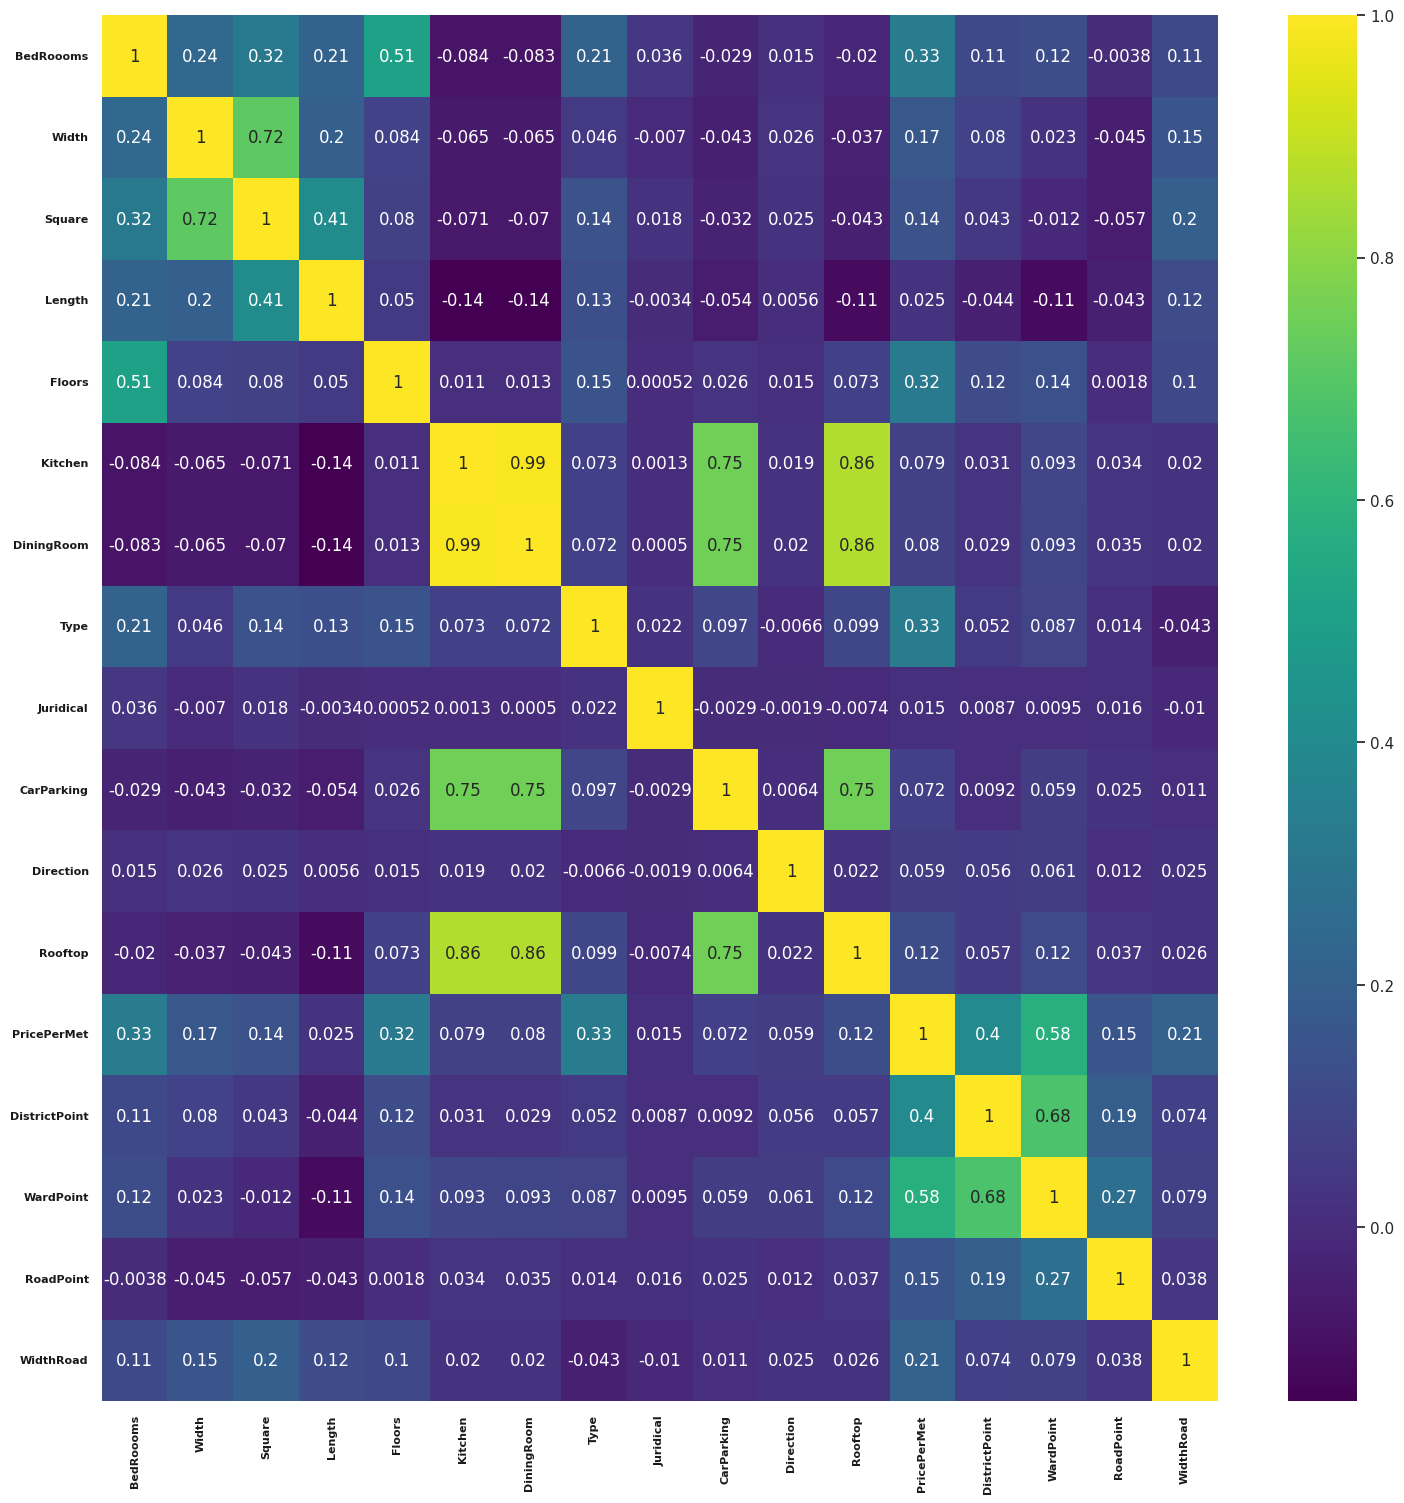

In [34]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=8,color='k',fontweight='bold')
plt.yticks(fontsize=8,color='k',fontweight='bold')
plt.show()

**Chuẩn hóa dữ liệu**

Chuẩn hoá Min-Max

In [35]:
min_max=MinMaxScaler()
df_minmax =pd.DataFrame(min_max.fit_transform(data),columns=data.columns)
# df_minmax
nameFileScaler = 'scaler.save'
joblib.dump(min_max, nameFileScaler) 
df_minmax.info()
df_minmax.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24521 entries, 0 to 24520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedRoooms      24521 non-null  float64
 1   Width          24521 non-null  float64
 2   Square         24521 non-null  float64
 3   Length         24521 non-null  float64
 4   Floors         24521 non-null  float64
 5   Kitchen        24521 non-null  float64
 6   DiningRoom     24521 non-null  float64
 7   Type           24521 non-null  float64
 8   Juridical      24521 non-null  float64
 9   CarParking     24521 non-null  float64
 10  Direction      24521 non-null  float64
 11  Rooftop        24521 non-null  float64
 12  PricePerMet    24521 non-null  float64
 13  DistrictPoint  24521 non-null  float64
 14  WardPoint      24521 non-null  float64
 15  RoadPoint      24521 non-null  float64
 16  WidthRoad      24521 non-null  float64
dtypes: float64(17)
memory usage: 3.2 MB


,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad
count,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000,24521.000000
mean,0.288329,0.470141,0.336954,0.485436,0.374716,0.388524,0.384976,0.488907,0.989988,0.393214,0.423957,0.330370,0.317366,0.623153,0.580316,0.490067,0.338816
std,0.195245,0.181821,0.239404,0.222833,0.266853,0.487425,0.486600,0.232369,0.086223,0.488474,0.330022,0.470356,0.217889,0.288397,0.240967,0.263935,0.224384
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.153846,0.357143,0.187758,0.428571,0.200000,0.000000,0.000000,0.357143,1.000000,0.000000,0.142857,0.000000,0.168513,0.333333,0.375000,0.245951,0.180000
50%,0.307692,0.364286,0.252501,0.500000,0.400000,0.000000,0.000000,0.357143,1.000000,0.000000,0.285714,0.000000,0.258475,0.666667,0.517857,0.509804,0.260000
75%,0.360279,0.515469,0.390818,0.571429,0.400000,1.000000,1.000000,0.714286,1.000000,1.000000,0.714286,1.000000,0.376862,0.833333,0.803571,0.705882,0.380000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Áp dụng mô hình Linear đa biến để dự đoán**

In [36]:
resultLinear = trainingLinearRegression(data)
mean = 0
for item in resultLinear:
  mean += item['r2']
mean /= round(len(resultLinear), 3)
mean

49.67229769385999

# Áp dụng K-mean để có khả năng tăng độ chính xác cho model


Sử dụng phương pháp chọn K bằng elbow:

- Distortion: Trung bình cộng phương khoảng cách giữa tâm cụm đến các điểm còn lại.
- Chọn K mà khi tăng giá trị của nó thì giá trị Distortion cón xu hướng đi ngang hoặc giảm không đáng kể

In [37]:
k = []
for i in range(1,30):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_minmax.drop(['PricePerMet'], axis = 1))
    k.append(kmeans.inertia_)

elbow_df = pd.DataFrame(index=range(1,30),data=k).reset_index()
elbow_df = elbow_df.rename(columns={'index':'Number_of_clusters',0:'Sum_of_intra_cluster_squares'})

<Axes: xlabel='Number_of_clusters', ylabel='Sum_of_intra_cluster_squares'>

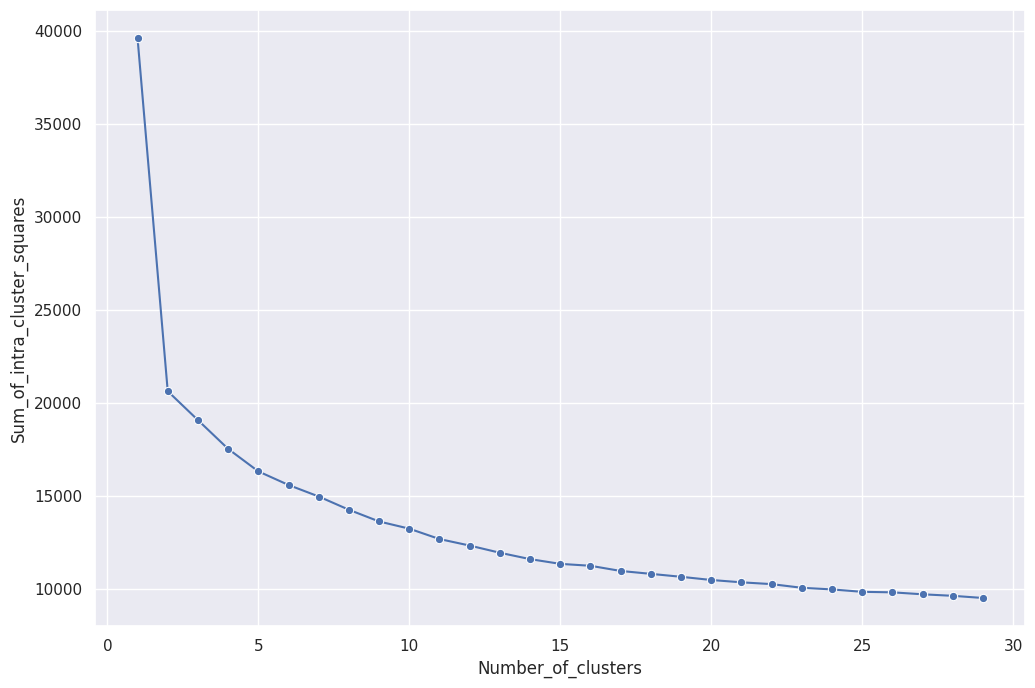

In [38]:
plt.figure(figsize=(12,8))
sns.lineplot(x=elbow_df.Number_of_clusters, y=elbow_df.Sum_of_intra_cluster_squares, marker='o')

=> Chọn k = 20

Thực hiện K-means với k=20

In [39]:
kmeans = MiniBatchKMeans(n_clusters=20,
                          random_state=0,
                          batch_size=10)
y_pred = kmeans.fit_predict(df_minmax)
nameFileKMeans = 'KMeansCluster.save'
joblib.dump(kmeans, nameFileKMeans) 

['KMeansCluster.save']

In [40]:
df_kmeans = df_minmax.copy()
df_kmeans['Clusters'] = pd.Series(y_pred)
df_kmeans

,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,Direction,Rooftop,PricePerMet,DistrictPoint,WardPoint,RoadPoint,WidthRoad,Clusters
0,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,0.285714,1.0,0.103697,1.000000,1.000000,0.800938,0.56,8
1,0.230769,0.357143,0.193643,0.285714,0.4,1.0,1.0,0.714286,1.0,1.0,1.000000,1.0,0.435661,1.000000,1.000000,0.277494,0.20,2
2,0.230769,0.357143,0.267216,0.642857,0.2,1.0,1.0,0.714286,1.0,1.0,0.000000,1.0,0.545334,0.666667,0.910714,0.154731,0.26,4
3,0.076923,0.714286,0.546792,0.571429,0.0,1.0,1.0,0.714286,1.0,1.0,0.285714,1.0,0.205361,0.166667,0.392857,0.541773,0.16,0
4,1.000000,0.714286,1.000000,0.857143,1.0,0.0,0.0,1.000000,1.0,0.0,0.000000,0.0,0.129839,0.833333,0.892857,0.819693,0.80,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,0.076923,0.515469,0.213832,0.500000,0.2,1.0,1.0,0.357143,1.0,0.0,0.142857,0.0,0.267480,0.333333,0.500000,0.528559,0.38,7
24517,0.230769,0.515469,0.131548,0.500000,0.4,0.0,0.0,0.357143,1.0,1.0,1.000000,0.0,0.218349,0.833333,0.732143,0.697357,0.10,16
24518,0.360279,0.515469,0.252501,0.500000,0.2,1.0,1.0,0.357143,1.0,1.0,0.428571,1.0,0.132744,0.333333,0.178571,0.113811,0.16,0
24519,0.153846,0.515469,0.208358,0.500000,0.4,1.0,1.0,0.357143,1.0,1.0,0.428571,0.0,0.234284,0.166667,0.214286,0.037084,0.18,0


Áp dụng LinearRegression cho mô hình sau khi đã chia cụm

In [41]:
data_temp = df_kmeans.copy()
for i in range(0,20):
  colums = 'Clusters_' + str(i)
  data_temp[colums] = (data_temp['Clusters'] == i)*1
data_temp

,BedRoooms,Width,Square,Length,Floors,Kitchen,DiningRoom,Type,Juridical,CarParking,...,Clusters_10,Clusters_11,Clusters_12,Clusters_13,Clusters_14,Clusters_15,Clusters_16,Clusters_17,Clusters_18,Clusters_19
0,1.000000,1.000000,1.000000,0.000000,1.0,1.0,1.0,1.000000,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,0.230769,0.357143,0.193643,0.285714,0.4,1.0,1.0,0.714286,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,0.230769,0.357143,0.267216,0.642857,0.2,1.0,1.0,0.714286,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,0.076923,0.714286,0.546792,0.571429,0.0,1.0,1.0,0.714286,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.000000,0.714286,1.000000,0.857143,1.0,0.0,0.0,1.000000,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24516,0.076923,0.515469,0.213832,0.500000,0.2,1.0,1.0,0.357143,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
24517,0.230769,0.515469,0.131548,0.500000,0.4,0.0,0.0,0.357143,1.0,1.0,...,0,0,0,0,0,0,1,0,0,0
24518,0.360279,0.515469,0.252501,0.500000,0.2,1.0,1.0,0.357143,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
24519,0.153846,0.515469,0.208358,0.500000,0.4,1.0,1.0,0.357143,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


Hàm Train model

In [42]:
def trainModel(model):
  X = data_temp.drop(["PricePerMet","Clusters"], axis=1)
  Y = data_temp["PricePerMet"]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
  model.fit(X_train, Y_train)
  predictions = model.predict(X_test)
  compare_df = pd.DataFrame({
      "Target" : Y_test,
      "Prediction" : predictions
  })
  rmse = np.sqrt(mean_squared_error(Y_test, predictions))
  print(f"The RMSE: {rmse:.4f}")
  r2 = r2_score(Y_test, predictions)
  print(f"The r2 score: {r2 * 100:.2f} %")
  return compare_df

Thử với model LinearRegression

In [43]:
model = LinearRegression()
resultTrain = trainModel(model)

The RMSE: 0.1408
The r2 score: 59.19 %


Hàm get các tham số nhất cho model

In [44]:
def getBestParams(param_grid, model):
  
  X = data_temp.drop(["PricePerMet","Clusters"], axis=1)
  Y = data_temp["PricePerMet"]
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5) 
  grid = GridSearchCV(model, param_grid, refit = True, verbose = 1)
  grid.fit(X_train, Y_train)
  return grid

Dùng với model LinearSVR

In [45]:
param_grid = {'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive'],
              'random_state': [1, 2, 3, 4, 5]} 
resultParams = getBestParams(param_grid, LinearSVR())
print(resultParams.best_params_, resultParams.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'loss': 'squared_epsilon_insensitive', 'random_state': 2} 0.5799481984868723


In [46]:
model = LinearSVR(loss = 'squared_epsilon_insensitive', max_iter = 1000, random_state = 5)
resultTrain = trainModel(model)

The RMSE: 0.1408
The r2 score: 59.19 %


Dùng với model SVR

In [47]:
# model = SVR(kernel='rbf', gamma='scale')
# resultTrain = trainModel(model)
param_grid = {'gamma': ['scale', 'auto'],
              'kernel': ['rbf', 'linear', 'poly', 'rbf', 'sigmoid']} 
resultParams = getBestParams(param_grid, SVR())
print(resultParams.best_params_, resultParams.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'gamma': 'scale', 'kernel': 'rbf'} 0.6365723988554576


In [48]:
model = SVR(gamma = 'scale', kernel = 'rbf')
resultTrain = trainModel(model)

The RMSE: 0.1306
The r2 score: 64.89 %


Dùng với model NuSVR

In [49]:
param_grid = {'gamma': ['scale', 'auto'],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
resultParams = getBestParams(param_grid, NuSVR())
print(resultParams.best_params_, resultParams.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'gamma': 'scale', 'kernel': 'rbf'} 0.6392222310794667


In [50]:
model = NuSVR(gamma = 'scale', kernel =  'rbf')
resultTrain = trainModel(model)
filename = 'BDSModel.sav'
pickle.dump(model, open(filename, 'wb'))

The RMSE: 0.1299
The r2 score: 65.25 %


In [51]:
loaded_model = pickle.load(open(filename, 'rb'))
test213= [{"BedRoooms": 0.4, "Width":	0.6, "Square": 0.3,	"Length":0.8,	"Floors": 0.2,	"Kitchen": 1,	"DiningRoom": 1,	"Type": 9,	"Juridical": 1,	"CarParking": 0, "Direction": 4, "Rooftop": 1, "DistrictPoint": 0.4, "WardPoint": 0.5, "RoadPoint": 0.6, "WidthRoad": 0.7,	"Clusters_0": 0,	"Clusters_1": 0, "Clusters_2": 0, "Clusters_3": 0,	"Clusters_4": 1, "Clusters_5":0, "Clusters_6": 0, "Clusters_7":0, "Clusters_8":0, "Clusters_9":0, "Clusters_10":0, "Clusters_11":0, "Clusters_12":0, "Clusters_13":0, "Clusters_14":0, "Clusters_15":0, "Clusters_16":0, "Clusters_17":0, "Clusters_18":0, "Clusters_19":0}]
dta213 = pd.DataFrame.from_dict(test213)
resultTest = loaded_model.predict(dta213)
resultTest

array([0.03956416])

In [52]:
scalerSaver = joblib.load(nameFileScaler) 
print(scalerSaver)

MinMaxScaler()


In [53]:
test = joblib.load(nameFileKMeans) 
test.cluster_centers_

array([[1.99800250e-01, 4.22617913e-01, 2.86539195e-01, 4.92445106e-01,
        2.76296296e-01, 9.92592593e-01, 9.89814815e-01, 5.12764550e-01,
        9.90277778e-01, 1.00000000e+00, 2.54761905e-01, 7.00925926e-01,
        1.91476334e-01, 2.91203704e-01, 3.64897487e-01, 4.08965221e-01,
        3.02666667e-01],
       [2.95681156e-01, 4.82219957e-01, 3.10912985e-01, 4.86910173e-01,
        5.06565657e-01, 0.00000000e+00, 0.00000000e+00, 5.52849928e-01,
        9.82323232e-01, 1.51515152e-02, 4.62481962e-01, 5.05050505e-03,
        7.48187415e-01, 7.53367003e-01, 8.55519481e-01, 7.19602246e-01,
        3.63646465e-01],
       [2.86587167e-01, 4.58416814e-01, 3.17850859e-01, 4.76091549e-01,
        5.26056338e-01, 9.92957746e-01, 9.94718310e-01, 5.96453722e-01,
        9.82394366e-01, 1.00000000e+00, 7.37173038e-01, 9.61267606e-01,
        6.06375796e-01, 8.24823944e-01, 8.17530181e-01, 5.91340670e-01,
        4.90464789e-01],
       [2.80898965e-01, 3.98593200e-01, 2.60100565e-01, 5.165

<Axes: xlabel='Prediction', ylabel='Target'>

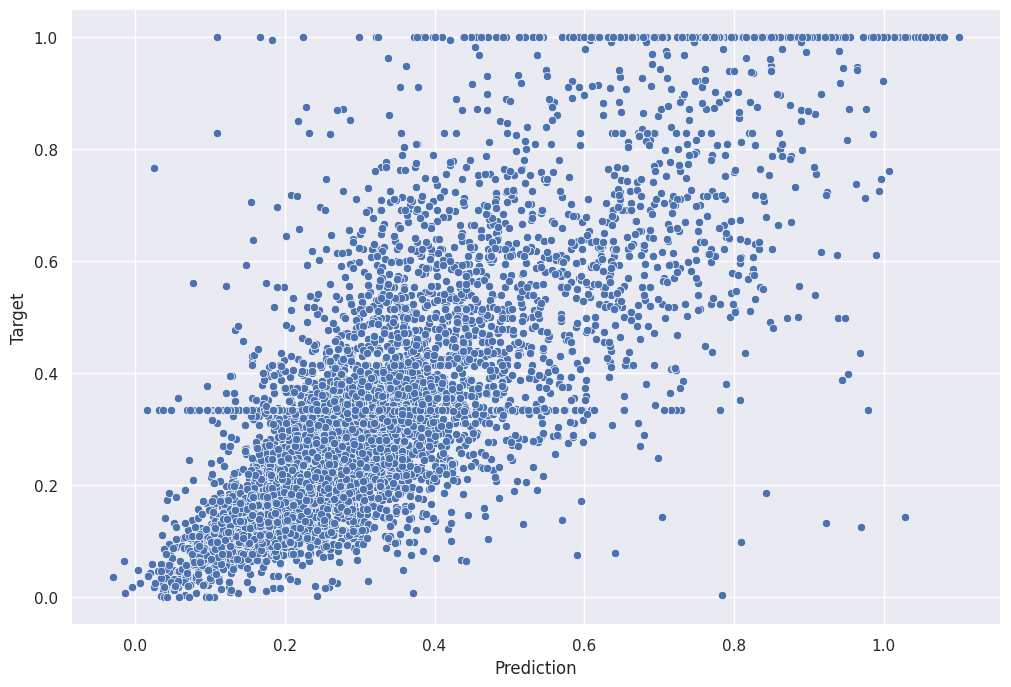

In [54]:
plt.figure(figsize=[12,8])
sns.scatterplot(x='Prediction', y='Target', data=resultTrain)